<a href="https://colab.research.google.com/github/AdicherlaVenkataSai/MLwithPython/blob/master/4.%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Lab you will load a customer dataset, fit the data, and use K-Nearest Neighbors to predict a data point. But what is K-Nearest Neighbors?

K-Nearest Neighbors is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

### load the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


### About the data
Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

In [2]:
# Lets download the dataset. To download the data, we will use !wget to download it from IBM Object Storage.
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-06-13 08:41:16--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.1s    

2020-06-13 08:41:17 (241 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



# load the data

In [0]:
df = pd.read_csv('teleCust1000t.csv')

In [4]:
df.shape

(1000, 12)

In [5]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [6]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [8]:
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

In [9]:
df.describe

<bound method NDFrame.describe of      region  tenure  age  marital  ...  retire  gender  reside  custcat
0         2      13   44        1  ...     0.0       0       2        1
1         3      11   33        1  ...     0.0       0       6        4
2         3      68   52        1  ...     0.0       1       2        3
3         2      33   33        0  ...     0.0       1       1        1
4         2      23   30        1  ...     0.0       0       4        3
..      ...     ...  ...      ...  ...     ...     ...     ...      ...
995       3      10   39        0  ...     0.0       1       3        1
996       1       7   34        0  ...     0.0       1       1        1
997       3      67   59        0  ...     0.0       1       1        4
998       3      70   49        0  ...     0.0       1       1        3
999       3      50   36        1  ...     0.0       1       3        2

[1000 rows x 12 columns]>

In [10]:
df.describe(include = 'all')

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


### Data visulaization

as its is a classification problems, lets see how many class are available in th target variable

In [11]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

we got 4 classes
281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82f3c50d68>]],
      dtype=object)

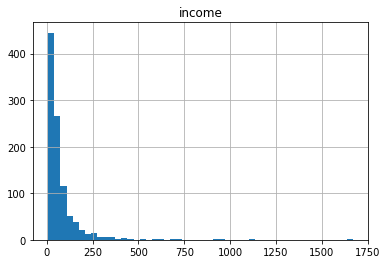

In [16]:
df.hist(column = 'income', bins =50)

In [17]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [18]:
# define the feature set
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [19]:
# target set
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

### Normalize the data

In [21]:
# Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
X_train.shape,  y_train.shape, X_test.shape,  y_test.shape

((800, 11), (800,), (200, 11), (200,))

# KNN CLassification

In [0]:
from sklearn.neighbors import KNeighborsClassifier as knn

### trianing

In [26]:
# let k = 4

clf = knn(n_neighbors = 5 )
clf.fit(X_train,y_train)
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Predicting

In [27]:
y_hat = clf.predict(X_test)
y_hat

array([1, 3, 3, 4, 4, 3, 3, 4, 2, 4, 1, 4, 2, 1, 3, 1, 3, 3, 3, 4, 3, 2,
       1, 1, 1, 3, 2, 1, 1, 2, 3, 1, 4, 4, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       4, 1, 3, 1, 4, 4, 2, 1, 2, 3, 2, 3, 4, 3, 1, 4, 1, 4, 2, 3, 2, 1,
       1, 2, 2, 1, 1, 3, 2, 3, 2, 1, 1, 1, 2, 3, 3, 1, 2, 2, 4, 2, 3, 3,
       1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 3, 4, 2, 3, 3, 1, 1, 4, 2, 2, 1, 2,
       1, 2, 2, 4, 1, 2, 1, 3, 2, 3, 4, 1, 2, 3, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 4, 4, 1, 1, 2, 1, 1, 2, 2, 1, 2, 4, 3,
       2, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 4, 1, 1, 3, 1, 3, 3, 3, 2, 2, 2,
       1, 4, 1, 1, 1, 1, 1, 3, 3, 1, 2, 1, 4, 1, 3, 1, 3, 3, 3, 1, 1, 3,
       2, 3])

### Accuracy evaluation
In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [29]:
from sklearn import metrics

train_acc = metrics.accuracy_score(y_train, clf.predict(X_train))
test_acc = metrics.accuracy_score(y_test, y_hat)
train_acc, test_acc

(0.5375, 0.315)

### What about other K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

### Practise

In [32]:
train_acc1 = []
test_acc1 = []

for i in range(1, 20, 2):

  clf = knn(n_neighbors = i )
  clf.fit(X_train, y_train)
  y_hat = clf.predict(X_test)
  a1 = metrics.accuracy_score(y_train, clf.predict(X_train))
  train_acc1.append(a1)
  b1 = metrics.accuracy_score(y_test, y_hat)
  test_acc1.append(b1)

train_acc1, test_acc1

([1.0, 0.56875, 0.5375, 0.5125, 0.5025, 0.47625, 0.465, 0.45, 0.4625, 0.45125],
 [0.3, 0.315, 0.315, 0.335, 0.34, 0.315, 0.33, 0.34, 0.355, 0.345])

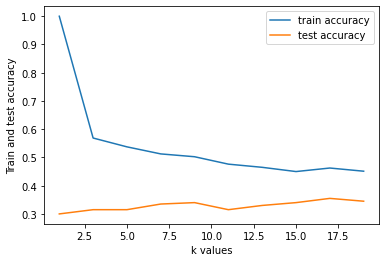

In [43]:
# plot the results

plt.plot(range(1, 20, 2), train_acc1, label = 'train accuracy')
plt.plot(range(1, 20, 2),test_acc1, label = 'test accuracy')
plt.xlabel('k values')
plt.ylabel('Train and test accuracy')
plt.legend()
plt.show()

### for other k

In [39]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = knn(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 , 0.36 , 0.355, 0.35 ,
       0.345])

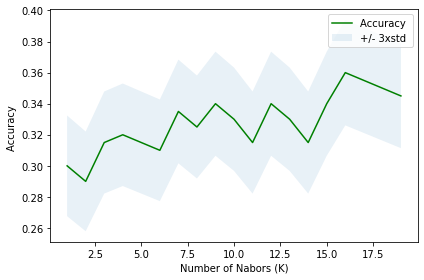

In [40]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [44]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.36 with k= 16
